In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()

In [2]:
type(california)

sklearn.utils._bunch.Bunch

In [3]:
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [4]:
print(type(california.data), type(california.target))

<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [5]:
print(california.data.shape, california.target.shape)

(20640, 8) (20640,)


In [6]:
data = pd.DataFrame(california.data, columns = california.feature_names)
data['Price'] = california.target
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [8]:
data.describe().round(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00,20640.00
mean,3.87,28.64,5.43,1.10,1425.48,3.07,35.63,-119.57,2.07
std,1.90,12.59,2.47,0.47,1132.46,10.39,2.14,2.00,1.15
min,0.50,1.00,0.85,0.33,3.00,0.69,32.54,-124.35,0.15
25%,2.56,18.00,4.44,1.01,787.00,2.43,33.93,-121.80,1.20
50%,3.53,29.00,5.23,1.05,1166.00,2.82,34.26,-118.49,1.80
75%,4.74,37.00,6.05,1.10,1725.00,3.28,37.71,-118.01,2.65
max,15.00,52.00,141.91,34.07,35682.00,1243.33,41.95,-114.31,5.00


In [9]:
y = data['Price']
X = data.drop('Price', axis=1)

In [10]:
y.shape, X.shape

((20640,), (20640, 8))

In [11]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [12]:
print("Coefficients: \n", model.coef_)

Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]


In [13]:
_ = [print(k, v) for k, v in zip(X.columns, model.coef_)]

MedInc 0.4366932931343245
HouseAge 0.009435778033237972
AveRooms -0.10732204139090447
AveBedrms 0.645065693519812
Population -3.976389421211576e-06
AveOccup -0.003786542654971
Latitude -0.42131437752714385
Longitude -0.43451375467477743


In [14]:
print("Intercept: \n", model.intercept_)

Intercept: 
 -36.94192020718441


In [15]:
y_pred = model.predict(X)
print(y_pred[:5])

[4.13164983 3.97660644 3.67657094 3.2415985  2.41358744]


In [16]:
print(y[:5])

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64


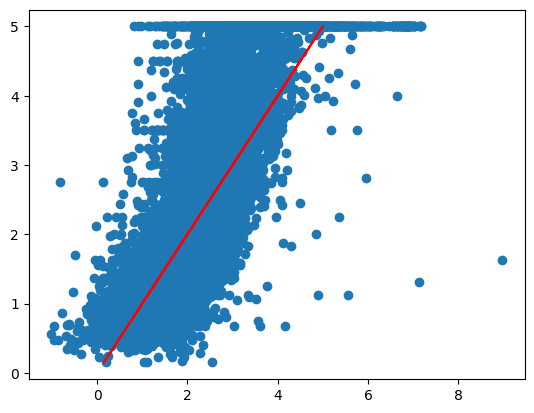

In [17]:
plt.scatter(y_pred, y)
plt.plot(y, y, c='r')

In [18]:
model.score(X, y)

0.606232685199805

In [19]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(5).fit_transform(X)

In [20]:
polynomial = LinearRegression()
polynomial.fit(poly, y)
y_pred_poly = polynomial.predict(poly)

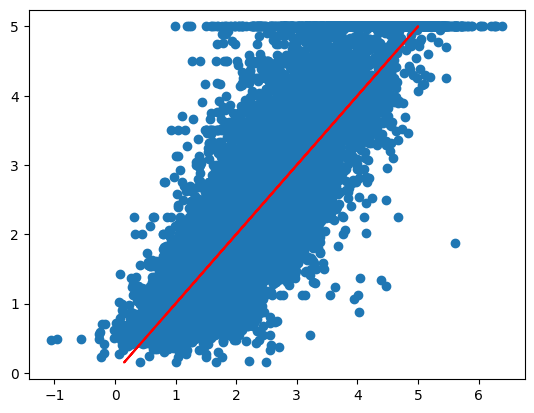

In [21]:
plt.scatter(y_pred_poly, y)
plt.plot(y, y, c='r')

In [22]:
polynomial.score(poly, y)

0.7460745292501869

Какую еще информацию можно вывести для обученной модели? Попробуйте изменить аргументы при создании модели и посмотрите, как это влияет на качество предсказания.

In [59]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.model_selection import train_test_split

from sklearn.datasets import load_diabetes

from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import BaggingRegressor

import pandas as pd

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
mean_squared_error(model.predict(X), y)

0.5243209861846072

In [28]:
mean_absolute_error(model.predict(X), y)

0.5311643817546476

In [29]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: Price, dtype: float64

Попробуйте применить к той же задаче другие модели регрессии. Для каждой из них выведите визуализацию регрессии и оценку точности. Рекомендуется исследовать следующие модели:

Метод опорных векторов

Без ядра

С гауссовым ядром

С полиномиальным ядром

Метод ближайших соседей

Многослойный перцептрон

Дерево решений

(*) Другие методы:

Гребневую регрессию

Регрессию Лассо

Регрессию ElasticNet

Случайный лес

Беггинг

Другие модели по желанию

In [52]:
models = []
models.append(SVR())
models.append(SVR(kernel="rbf"))
models.append(SVR(kernel="poly"))
models.append(KNeighborsRegressor(n_neighbors=5))
models.append(MLPRegressor())
models.append(DecisionTreeRegressor(criterion='absolute_error'))
models.append(Ridge())
models.append(Lasso())
models.append(ElasticNet())
models.append(RandomForestRegressor())
models.append(BaggingRegressor())

Напишите функцию, которая автоматически обучает все перечисленные модели и для каждой выдает оценку точности.

In [74]:
def auto_learning(models, X_train, X_test, y_train, y_test):
    dict_1 = {}
    dict_1["Metrix"] = ["MSE", "MAE", "MAPE"]
    for model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        print(model)
        print("MSE: ", mean_squared_error(y_test, y_pred))
        print("MAE: ", mean_absolute_error(y_test, y_pred))
        print("MAPE:", mean_absolute_percentage_error(y_test, y_pred))
        plt.scatter(y_pred, y_test)
        plt.plot(y, y, c='r')
        plt.show()
        name = str(model)
        dict_1[name[:20]] = [mean_squared_error(y_test, y_pred), mean_absolute_error(y_test, y_pred), mean_absolute_percentage_error(y_test, y_pred)]
        print()
    print(pd.DataFrame(dict_1))

SVR()
MSE:  1.3320115421348744
MAE:  0.8599506583445761
MAPE: 0.522783203345176


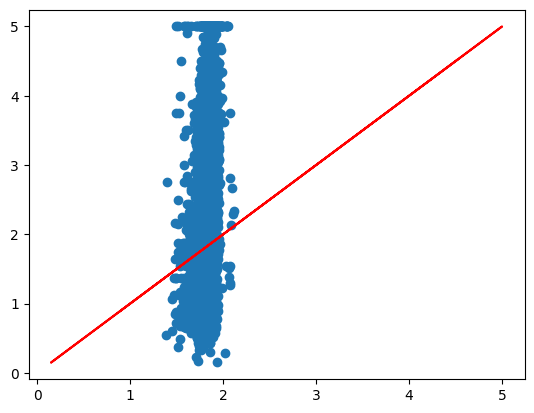


SVR()
MSE:  1.3320115421348744
MAE:  0.8599506583445761
MAPE: 0.522783203345176


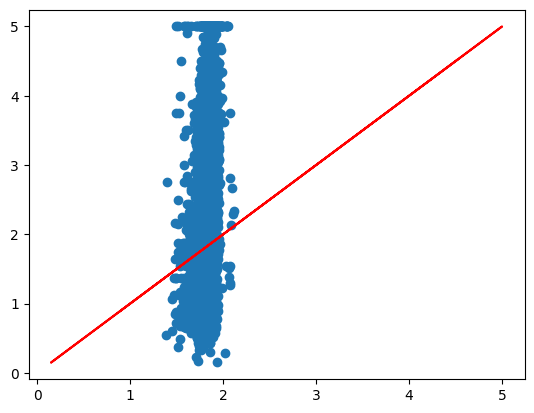


SVR(kernel='poly')
MSE:  1.348607592075733
MAE:  0.8631916980111946
MAPE: 0.5239664917026039


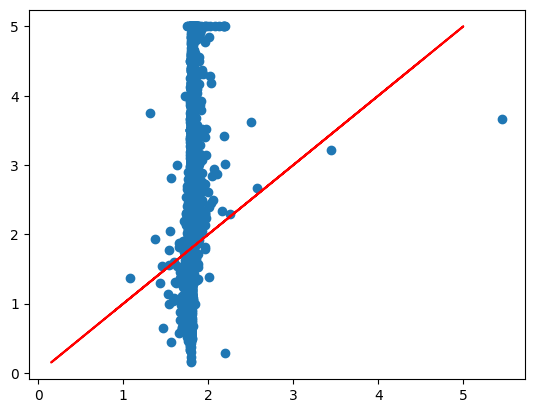


KNeighborsRegressor()
MSE:  1.1186823858768293
MAE:  0.8127975600775195
MAPE: 0.5344887935787594


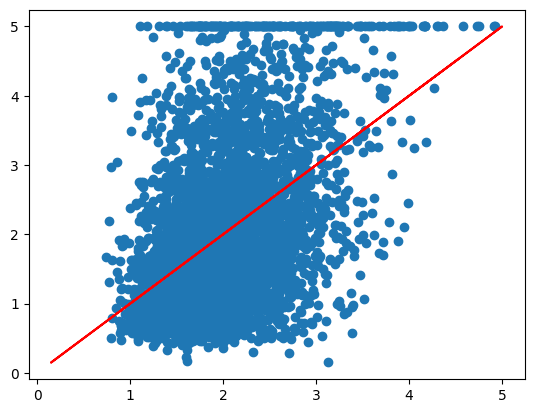


MLPRegressor()
MSE:  0.6034601184146028
MAE:  0.6076953927566959
MAPE: 0.39822701032171187


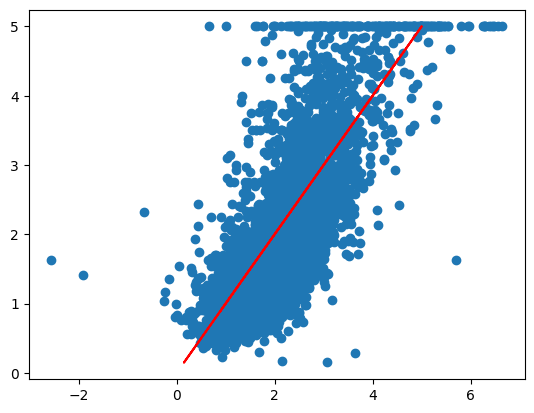


DecisionTreeRegressor(criterion='absolute_error')
MSE:  0.5398932235897529
MAE:  0.47278654312015495
MAPE: 0.2709185089180664


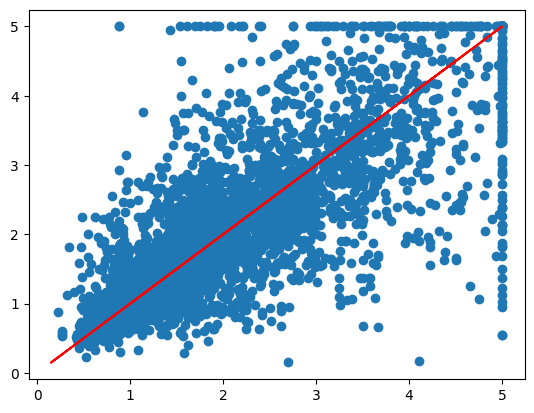


Ridge()
MSE:  0.5558034669932211
MAE:  0.5332039182571153
MAPE: 0.3195234706058807


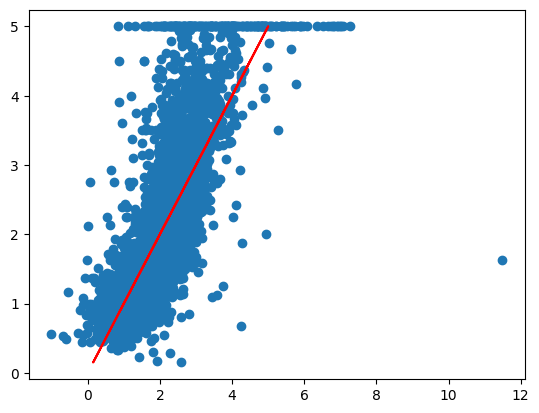


Lasso()
MSE:  0.9380337514945427
MAE:  0.7615782541669575
MAPE: 0.5243863484667893


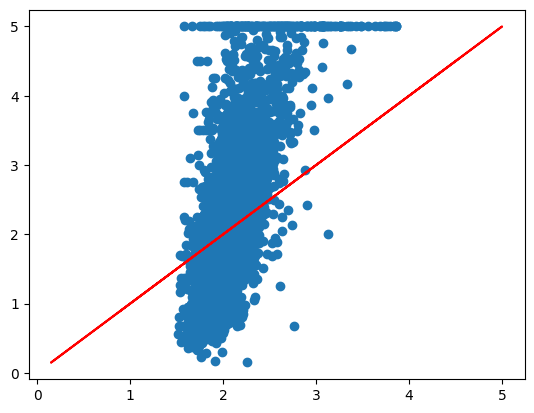


ElasticNet()
MSE:  0.7645556403971131
MAE:  0.676283586138053
MAPE: 0.4577249581761798


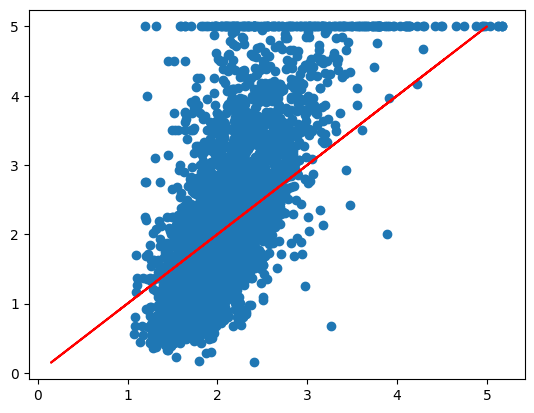


RandomForestRegressor()
MSE:  0.2539902214933209
MAE:  0.3264972966085273
MAPE: 0.18822248640545647


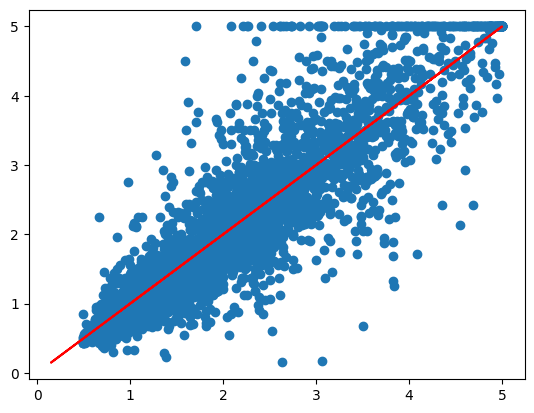


BaggingRegressor()
MSE:  0.2809632372334736
MAE:  0.34986628609496123
MAPE: 0.2014823567671108


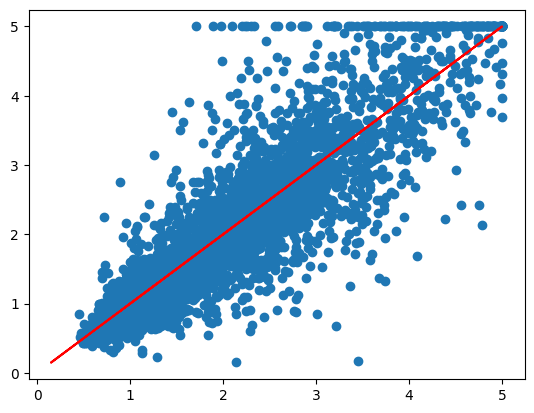


  Metrix     SVR()  SVR(kernel='poly')  KNeighborsRegressor(  MLPRegressor()  \
0    MSE  1.332012            1.348608              1.118682        0.603460   
1    MAE  0.859951            0.863192              0.812798        0.607695   
2   MAPE  0.522783            0.523966              0.534489        0.398227   

   DecisionTreeRegresso   Ridge()   Lasso()  ElasticNet()  \
0              0.539893  0.555803  0.938034      0.764556   
1              0.472787  0.533204  0.761578      0.676284   
2              0.270919  0.319523  0.524386      0.457725   

   RandomForestRegresso  BaggingRegressor()  
0              0.253990            0.280963  
1              0.326497            0.349866  
2              0.188222            0.201482  


In [57]:
auto_learning(models, X_train, X_test, y_train, y_test)

Повторите полностью анализ для другого набора данных - встроенного в sklearn датасета diabetes.

In [65]:
diabets = load_diabetes()


In [68]:
data = pd.DataFrame(diabets.data, columns = diabets.feature_names)
data['Diabet'] = diabets.target
data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,Diabet
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [69]:
y = data['Diabet']
X = data.drop('Diabet', axis=1)

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SVR()
MSE:  4333.285954518086
MAE:  56.02372412801096
MAPE: 0.49028421404764305


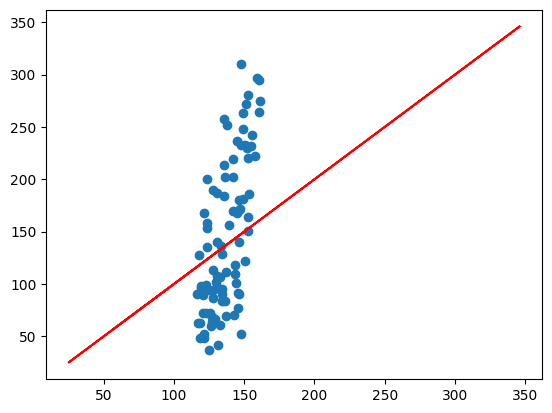


SVR()
MSE:  4333.285954518086
MAE:  56.02372412801096
MAPE: 0.49028421404764305


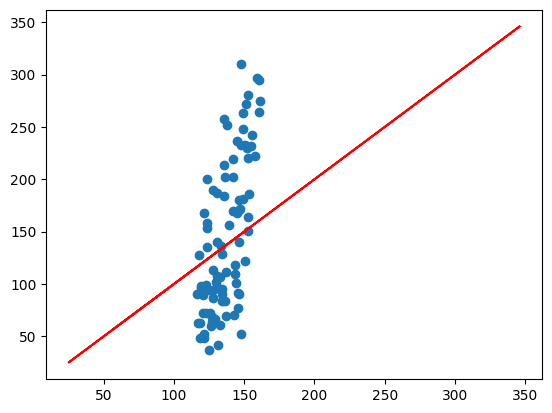


SVR(kernel='poly')
MSE:  3803.044078274641
MAE:  51.6616693928977
MAPE: 0.4420432802523609


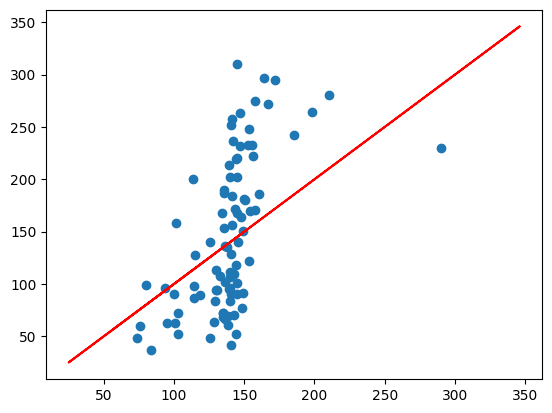


KNeighborsRegressor()
MSE:  3019.075505617978
MAE:  42.77078651685394
MAPE: 0.3635969317758066


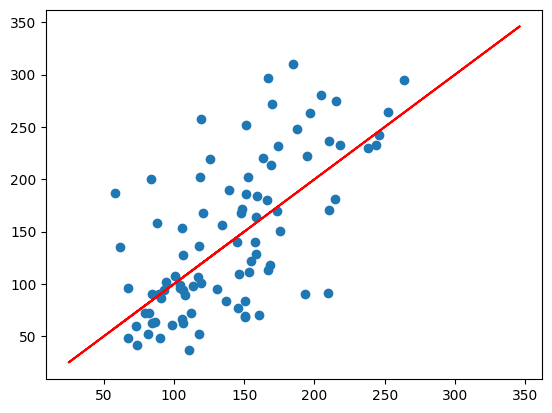

/usr/local/lib/python3.9/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor()
MSE:  22301.18763573395
MAE:  131.38631962090076
MAPE: 0.877907668890589


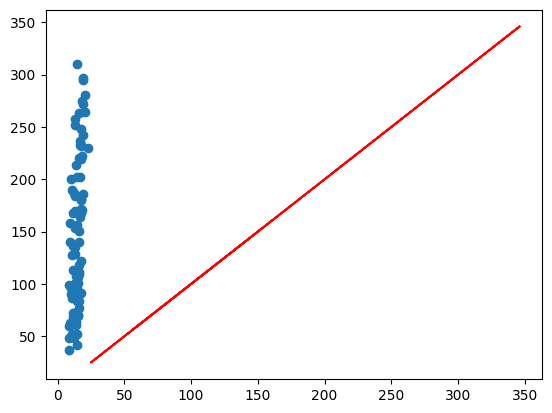


DecisionTreeRegressor(criterion='absolute_error')
MSE:  6586.966292134832
MAE:  63.86516853932584
MAPE: 0.5488621003501855


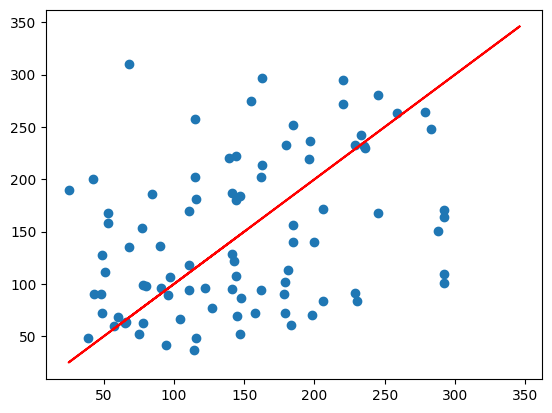


Ridge()
MSE:  3077.41593882723
MAE:  46.13885766697452
MAPE: 0.42569291627271477


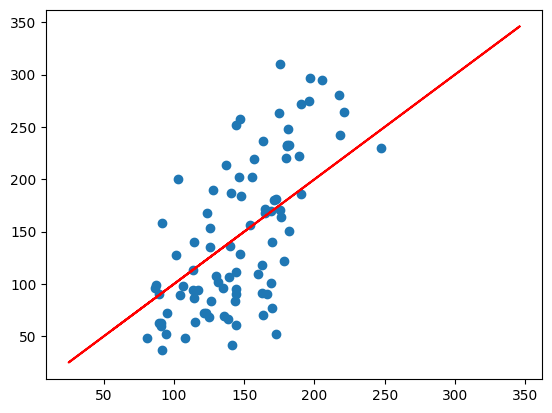


Lasso()
MSE:  3403.5757216070733
MAE:  49.73032753662261
MAPE: 0.47112563453406076


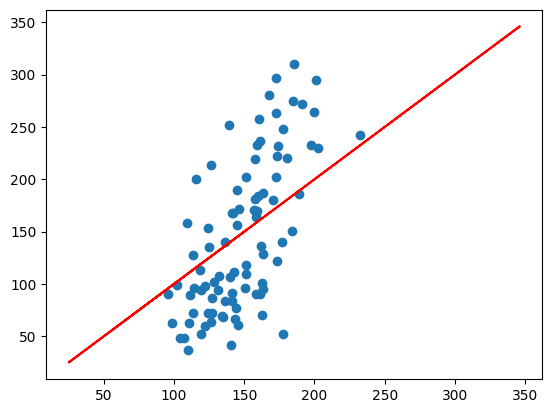


ElasticNet()
MSE:  5311.21282167187
MAE:  63.70590076411911
MAPE: 0.624748214632204


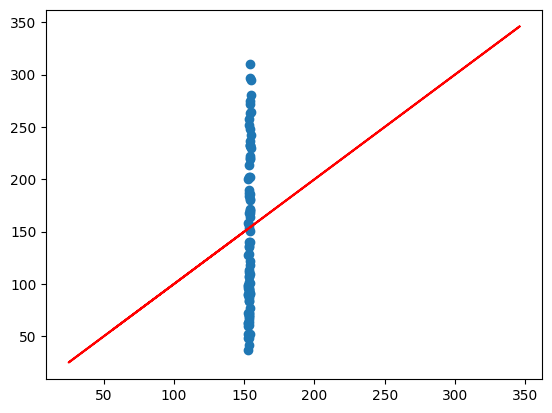


RandomForestRegressor()
MSE:  2953.3365415730336
MAE:  43.98584269662921
MAPE: 0.4010977991305075


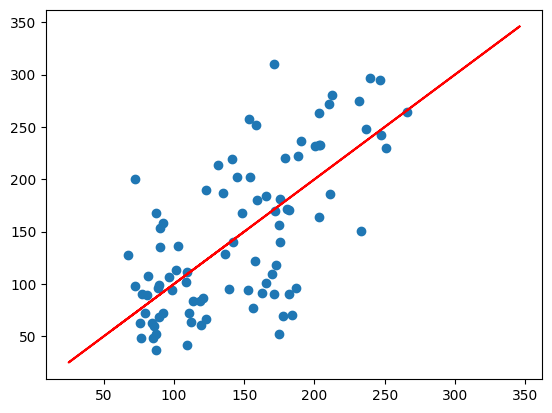


BaggingRegressor()
MSE:  3267.5514606741576
MAE:  46.38651685393259
MAPE: 0.40862839997898465


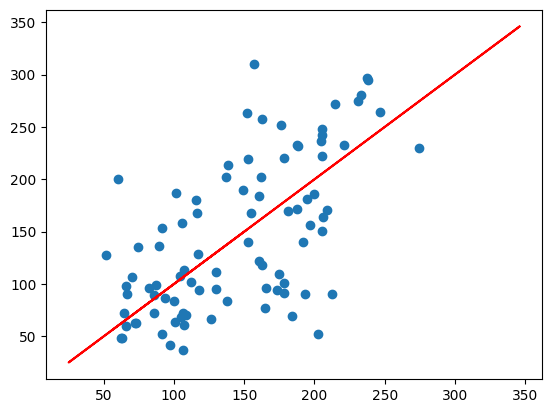


  Metrix        SVR()  SVR(kernel='poly')  KNeighborsRegressor(  \
0    MSE  4333.285955         3803.044078           3019.075506   
1    MAE    56.023724           51.661669             42.770787   
2   MAPE     0.490284            0.442043              0.363597   

   MLPRegressor()  DecisionTreeRegresso      Ridge()      Lasso()  \
0    22301.187636           6586.966292  3077.415939  3403.575722   
1      131.386320             63.865169    46.138858    49.730328   
2        0.877908              0.548862     0.425693     0.471126   

   ElasticNet()  RandomForestRegresso  BaggingRegressor()  
0   5311.212822           2953.336542         3267.551461  
1     63.705901             43.985843           46.386517  
2      0.624748              0.401098            0.408628  


In [75]:
auto_learning(models, X_train, X_test, y_train, y_test)